### Plotting and analysis of cell's characteristics

Here we import the cell data base and plot characteristics or do further analysis.

In [14]:
import numpy as np
import time, os, sys
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import matplotlib as mpl
from cellpose import utils, io
import czifile as czifile
import pandas as pd
import logging
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    # Warning-causing lines of code here
from PIL import Image

In [15]:
### Define all relevant directories and paths
directory_path = '/home/melma31/Documents/campari/'
### Input data base with mice data
data_base_path = directory_path + 'data_base_output_bkup.xlsx'


### STIMULI SELECTION

In [16]:
cell_data_output = pd.read_excel(data_base_path)
conditions = np.unique(cell_data_output['stimuli'])

In [17]:
stimuli_color = ['k','orange','cyan','magenta','yellow']
stimuli_names = ['Mock','Stroke','Brush']

[0 1 2]


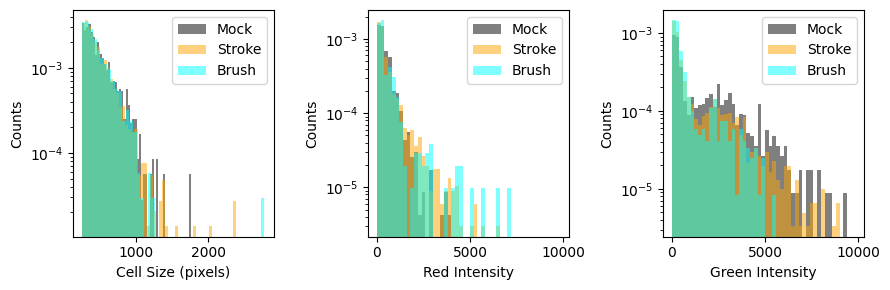

In [19]:

cell_data_output = pd.read_excel(data_base_path)
conditions = np.unique(cell_data_output['stimuli'])
print(conditions)

figure, axes = plt.subplots(1,3)

axes[0].set_xlabel('Cell Size (pixels)')
axes[0].set_ylabel('Counts')
axes[0].legend(['Convertion','Mock'])

bins = np.arange(0,10000,200)
axes[1].set_xlabel('Red Intensity')
axes[1].set_ylabel('Counts')
axes[1].legend(['Convertion1','Mock'])

axes[2].set_xlabel('Green Intensity')
axes[2].set_ylabel('Counts')
axes[2].legend(['Convertion','Mock'])


for con in conditions:

    selected_data = cell_data_output.loc[cell_data_output['stimuli']==con]
    cellsize = selected_data['cell_size']
    red_intensity = selected_data['red_int']
    green_intensity = selected_data['green_int']

    axes[0].hist(cellsize, bins = 50, density = True, color = stimuli_color[con], alpha = 0.5)
    axes[1].hist(red_intensity, bins = bins, density = True, color = stimuli_color[con],alpha = 0.5)
    axes[2].hist(green_intensity, bins = bins, density = True, color = stimuli_color[con],alpha = 0.5)

for i in range(3):
    axes[i].legend(stimuli_names)
    axes[i].set_yscale('log')

figure.set_size_inches([9,3])
plt.tight_layout()

figure.savefig(directory_path + 'figures/' + 'converted_vs_mock_statistics.png')

/tmp/ipykernel_383880/1360908416.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


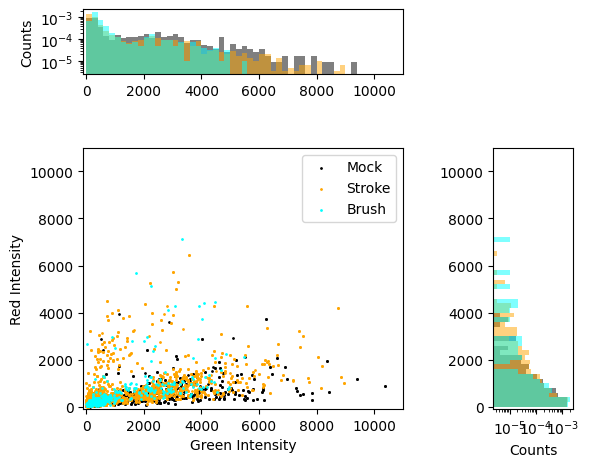

In [28]:
figure = plt.figure(figsize=(8, 8))
gs = figure.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.01, right=0.99, bottom=0.1, top=0.9,
                      wspace=0.45, hspace=0.45)
# Create the Axes.
axes = figure.add_subplot(gs[1, 0])
axes_hist_green = figure.add_subplot(gs[0, 0], sharex=axes)
axes_hist_red = figure.add_subplot(gs[1, 1], sharey=axes)
# Draw the scatter plot and marginals.

for con in conditions:

    selected_data = cell_data_output.loc[cell_data_output['stimuli']==con]
    red_intensity = selected_data['red_int']
    green_intensity = selected_data['green_int']
    positve_intensity = np.logical_and(green_intensity > 0,red_intensity>0)
    
    axes.scatter(green_intensity[positve_intensity], red_intensity[positve_intensity], color = stimuli_color[con], s = 1)
    
    x = green_intensity[positve_intensity]
    y = red_intensity[positve_intensity]
    axes_hist_green.hist(x, bins = bins, density = True, color = stimuli_color[con],alpha = 0.5)
    axes_hist_red.hist(y, bins = bins, density = True, color = stimuli_color[con],alpha = 0.5, orientation='horizontal')
 
axes.set_xlim([-100,11000])
axes.set_ylim([-100,11000])
axes.set_xlabel('Green Intensity')
axes.set_ylabel('Red Intensity')
axes.legend(stimuli_names)


#axes_hist_green.legend(stimuli_names)
axes_hist_green.set_yscale('log')
axes_hist_red.set_xscale('log')
axes_hist_green.set_ylabel('Counts')
axes_hist_red.set_xlabel('Counts')

figure.set_size_inches([5,5])
plt.tight_layout()

figure.savefig(directory_path + 'figures/' + 'converted_vs_mock_intensity_scatter.png')

In [22]:
from sklearn.linear_model import LinearRegression

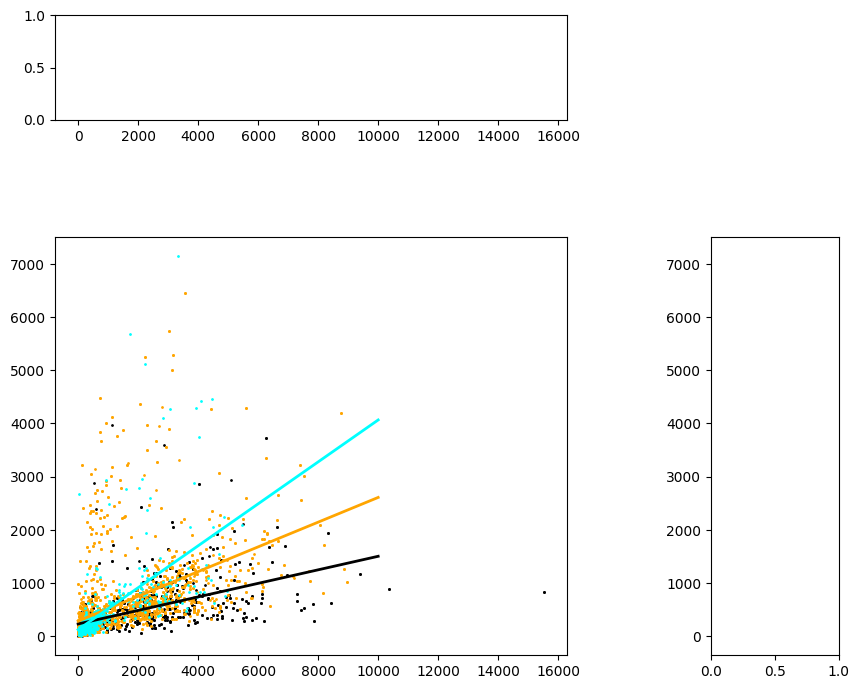

In [27]:
figure = plt.figure(figsize=(8, 8))
gs = figure.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.01, right=0.99, bottom=0.1, top=0.9,
                      wspace=0.45, hspace=0.45)

# Create the Axes.
axes = figure.add_subplot(gs[1, 0])
axes_hist_green = figure.add_subplot(gs[0, 0], sharex=axes)
axes_hist_red = figure.add_subplot(gs[1, 1], sharey=axes)
# Draw the scatter plot and marginals.
x = np.arange(0,10000)
for con in conditions:

    selected_data = cell_data_output.loc[cell_data_output['stimuli']==con]
    red_intensity = selected_data['red_int']
    green_intensity = selected_data['green_int']
    positve_intensity = np.logical_and(green_intensity > 0,red_intensity>0)
    
    X = np.array(green_intensity[positve_intensity]).reshape(-1, 1) 
    y = np.array(red_intensity[positve_intensity]).reshape(-1, 1) 
    reg = LinearRegression().fit(X, y)
    y_pred = reg.coef_[0] * x + reg.intercept_
    axes.scatter(green_intensity[positve_intensity], red_intensity[positve_intensity], color = stimuli_color[con], s = 1)
    axes.plot(x,y_pred,color = stimuli_color[con], linewidth = 2)

In [29]:
print(len(cell_data_output))

5275
